In [57]:
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
import easyocr

In [ ]:
import os
import requests
from urllib.parse import urljoin
import cv2
import numpy as np


def getPageUrl(html ,baseurl):
    links = [a.get("href") for a in soup.find_all("a") if a.get("href")]
    links = [urljoin(baseurl, link) if not link.startswith("http") else link for link in links]
    unique_links = list(set(links))
    return unique_links

def getPageText(html):
    text = soup.get_text()
    return text
    print(text)

#TO DO list
def getPageImage(html):
    images =[]
    imageUrls = [img.get("src") for img in soup.find_all("img") if img.get("src")]
    if not os.path.exists("images"):
        os.makedirs("images")
    for i, imgUrl in enumerate(imageUrls):
        if imgUrl.startswith("http"):
            imgData = requests.get(imgUrl ,stream=True).raw
            image = np.asarray(bytearray(imgData.read()), dtype="uint8")
            images.append(cv2.imdecode(image, cv2.IMREAD_COLOR))
    return images



In [ ]:
#testcase 1
with open("../data/toss/토스데이터분석.html", "r", encoding="utf-8") as file:
    html = file.read()
soup = BeautifulSoup(html, "html.parser")
print(getPageUrl(html))
print(getPageText(html))

In [ ]:
# testcase 2
with open("../data/GS리테일.html", "r", encoding="utf-8") as file:
    html = file.read()
soup = BeautifulSoup(html, "html.parser")
baseurl = "https://gsretail.recruiter.co.kr"
print(getPageUrl(html ,baseurl))
print(getPageText(html))
images  = getPageImage(html)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

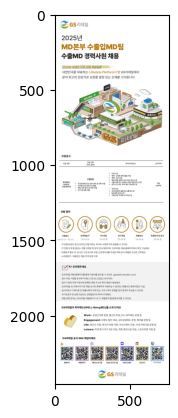

In [60]:
plt.imshow(images[1])
reader = easyocr.Reader(["en"])
result = reader.readtext(images[1])